# Лабраторна робота 2 
## Студента групи МІТ-21 
### Ярощука Назара Юрійовича 

1. Створити набір даних за допомогою DatasetGenerator

In [516]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd
x, y, coef = datasets.make_regression(n_samples = 10 , n_features = 10 , n_informative = 10 , noise = 0.2, coef=True)
df1 = pd.DataFrame(x, y)
df1.to_csv("datasetGenerator.csv")
df1.head()



,0,1,2,3,4,5,6,7,8,9
0.228296,1.705445,0.996648,0.473952,0.081018,0.351806,-0.944538,1.097494,-1.371796,0.216732,-0.198334
135.181317,1.727778,1.127710,-0.729623,-0.189741,0.497246,0.036957,0.553711,-0.183250,0.635392,0.058924
-101.518600,1.957878,-0.724666,-0.070163,-0.728318,1.038914,-0.019839,-0.634807,-1.509736,0.021235,1.682468
168.875417,0.295939,-0.194090,0.543032,0.996592,-0.404995,-1.858904,-0.594140,2.565272,0.606406,-2.066742
-27.093873,1.027338,-1.287576,-0.720149,0.674434,1.353508,-0.877699,-1.305080,0.189273,-0.858660,1.463149


Для отриманих наборів даних провести встановленні кроки моделювання.

In [517]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10 entries, 0.22829626476094564 to 82.35588257331223
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10 non-null     float64
 1   1       10 non-null     float64
 2   2       10 non-null     float64
 3   3       10 non-null     float64
 4   4       10 non-null     float64
 5   5       10 non-null     float64
 6   6       10 non-null     float64
 7   7       10 non-null     float64
 8   8       10 non-null     float64
 9   9       10 non-null     float64
dtypes: float64(10)
memory usage: 880.0 bytes


In [518]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.962796,-0.045348,-0.014124,0.533725,0.348255,-0.171557,0.052082,-0.005516,-0.018404,0.129237
std,0.942700,0.729726,0.614928,0.829717,0.832776,1.216298,0.860323,1.143607,0.938777,1.086880
min,-1.045099,-1.287576,-0.729623,-0.728318,-1.089107,-1.858904,-1.305080,-1.509736,-1.918268,-2.066742
25%,0.374723,-0.258269,-0.480082,-0.048341,-0.215795,-0.944627,-0.624640,-0.429726,-0.638686,-0.188793
50%,1.123202,-0.173039,-0.059179,0.488108,0.595148,-0.448769,0.060251,-0.111891,0.223661,0.062188
75%,1.722195,0.274161,0.348128,0.936922,0.955798,0.299610,0.585190,0.332084,0.628146,0.722993
max,1.957878,1.127710,1.207422,1.992618,1.353508,2.235617,1.359482,2.565272,0.933645,1.682468


<AxesSubplot:>

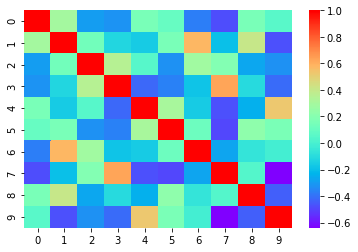

In [519]:
corr = df1.corr()
sns.heatmap(corr, cmap="rainbow")

Завантажити набір даних для регресії на сайті (у кожного студента має бути інший - прошу організуватись відповідним чином)

In [520]:
df2=pd.read_csv("water_potability.csv")
df2.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,1.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,303.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,323.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [521]:
df2.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,7.431085,201.052831,22424.782613,7.298607,333.449782,419.153043,13.825141,68.305668,3.837775,0.347826
std,2.275403,51.995366,7154.720583,1.568835,50.573083,81.523780,2.873532,17.738594,0.691879,0.481543
min,1.000000,47.432000,8532.139517,3.606036,187.170714,277.384537,8.399735,15.010000,2.436086,0.000000
25%,6.397459,172.756514,18560.038450,6.225507,303.077443,360.493440,11.544406,61.309976,3.439527,0.000000
50%,7.577112,211.870432,20571.910143,7.487289,331.001315,413.959607,13.839265,71.716982,3.962573,0.000000
75%,9.000000,230.252966,27350.933049,8.575555,366.275548,477.374372,15.583001,78.478355,4.376067,1.000000
max,13.175402,280.082411,41065.234765,10.094796,453.000000,592.885359,20.397022,100.341674,5.217895,1.000000


In [522]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               46 non-null     float64
 1   Hardness         46 non-null     float64
 2   Solids           46 non-null     float64
 3   Chloramines      46 non-null     float64
 4   Sulfate          46 non-null     float64
 5   Conductivity     46 non-null     float64
 6   Organic_carbon   46 non-null     float64
 7   Trihalomethanes  46 non-null     float64
 8   Turbidity        46 non-null     float64
 9   Potability       46 non-null     int64  
dtypes: float64(9), int64(1)
memory usage: 3.7 KB


<AxesSubplot:>

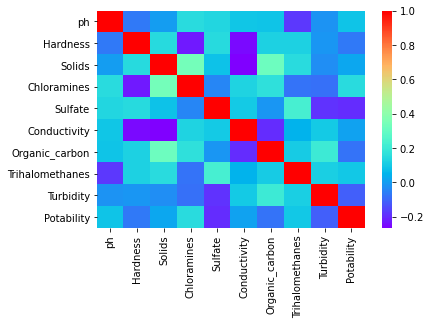

In [523]:
corr1 = df2.corr()
sns.heatmap(corr1, cmap="rainbow")

In [524]:
columns=df2.columns
columns=columns[:9]
x=df2[['ph', 'Hardness', 'Solids', 'Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
y=df2[['Potability']]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)



In [525]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_Hat = lr.predict(X_test)

In [526]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_Hat)

0.4412706881345163

In [527]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, y_Hat)

0.21827712834913995

In [528]:
res = pd.DataFrame(y_test)
res['Potability_predicted'] = y_Hat
res.head()

,Potability,Potability_predicted
18,0,0.457936
39,1,0.395982
29,0,0.396150
11,0,0.397034
14,0,0.325258


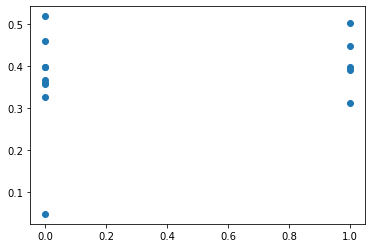

In [529]:
plt.scatter(res['Potability'],res['Potability_predicted'])


(опціонально для отримання відмінної оцінки) Згенерувати набір даних для регресії на основі звичайних можливостей Python.

In [530]:
sex = {0:'Female', 1:'Male'}
sick_coronavirus = {0:'No', 1:'Yes'}
vaccine = {0:'Dont have', 1:'Have'}
type_of_vaccine = {0:'Pfizer', 1:'Moderna', 2: 'AstraZeneca', 3: 'Covaxin'}
citizenship = {0:'Ukrainian', 1:'Poland', 2:'Portugal', 3:'Germany'}
info = []
for i in range(0, 256):
    row = []
    row.append(sex[rnd.randint(0, 1)])
    row.append(sick_coronavirus[rnd.randint(0, 1)])
    row.append(vaccine[rnd.randint(0, 1)])
    row.append(type_of_vaccine[rnd.randint(0, 3)])
    row.append(citizenship[rnd.randint(0, 3)])
    info.append(row)
df3 = pd.DataFrame(info, columns=['sex', 'sick_coronavirus', 'vaccine', 'type_of_vaccine', 'citizenship'])
df3.to_csv('df3.csv')
df3.head()


,sex,sick_coronavirus,vaccine,type_of_vaccine,citizenship
0,Male,No,Dont have,AstraZeneca,Ukrainian
1,Female,No,Have,Pfizer,Poland
2,Male,No,Have,AstraZeneca,Poland
3,Female,No,Have,Covaxin,Portugal
4,Female,No,Have,Pfizer,Portugal


In [531]:
df3.replace({'Female': 0, 'Male':1, 'No': 0, 'Yes':1, 'Dont have':0, 'Have':1, 'Pfizer':0, 'Moderna':1, 'AstraZeneca':2, 'Covaxin':3, 'Ukrainian': 0, 'Poland':1, 'Portugal':2, 'Germany':3}, None, True)


In [532]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   sex               256 non-null    int64
 1   sick_coronavirus  256 non-null    int64
 2   vaccine           256 non-null    int64
 3   type_of_vaccine   256 non-null    int64
 4   citizenship       256 non-null    int64
dtypes: int64(5)
memory usage: 10.1 KB


In [533]:
df3.describe()

,sex,sick_coronavirus,vaccine,type_of_vaccine,citizenship
count,256.000000,256.000000,256.00000,256.000000,256.000000
mean,0.507812,0.503906,0.46875,1.492188,1.441406
std,0.500918,0.500964,0.50000,1.095417,1.090280
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,1.000000,0.750000
50%,1.000000,1.000000,0.00000,1.000000,1.000000
75%,1.000000,1.000000,1.00000,2.000000,2.000000
max,1.000000,1.000000,1.00000,3.000000,3.000000


<AxesSubplot:>

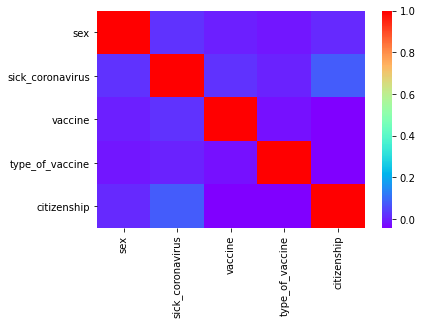

In [534]:
corr2 = df3.corr()
sns.heatmap(corr2, cmap="rainbow")

In [535]:
columns=df3.columns
columns=columns[:4]
x=df3[['sex', 'sick_coronavirus', 'vaccine', 'type_of_vaccine']]
y=df3[['citizenship']]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)


In [536]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_Hat = lr.predict(X_test)

In [537]:
mean_absolute_error(y_test, y_Hat)

0.99658117078398

In [538]:
mean_squared_error(y_test, y_Hat)

1.3023133292428515

In [539]:
res = pd.DataFrame(y_test)
res['citizenship_predicted'] = y_Hat
res.head()

,citizenship,citizenship_predicted
197,1,1.301798
187,3,1.093394
20,0,1.525560
198,2,1.606751
77,2,1.346382


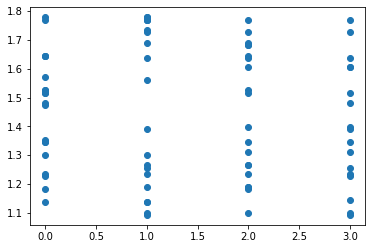

In [540]:
plt.scatter(res['citizenship'],res['citizenship_predicted'])
